In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#ImportLibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xml.etree.ElementTree as ET
import os
import cv2 as cv
import tensorflow as tf
from wordcloud import WordCloud
import re
from collections import defaultdict
import itertools
from collections import Counter
import glob
from PIL import Image

In [3]:

import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D,AveragePooling2D,TimeDistributed
from tensorflow.keras.models import Model
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [5]:
%cd /content/drive/MyDrive/Main Capstone/Data

/content/drive/MyDrive/Main Capstone/Data


In [6]:
%pwd

'/content/drive/MyDrive/Main Capstone/Data'

In [8]:
#Dataset
df = pd.read_excel (r'/content/drive/MyDrive/Main Capstone/Final_Input.xlsx')
print (df)

                    Images  ... Gender
0    A_ADI_LAKSHMI_65Y_F_1  ...      F
1    A_ADI_LAKSHMI_65Y_F_2  ...      F
2    A_ADI_LAKSHMI_65Y_F_3  ...      F
3    A_ADI_LAKSHMI_65Y_F_4  ...      F
4    A_ADI_LAKSHMI_65Y_F_5  ...      F
..                     ...  ...    ...
555         SK_ASHA_35Y_16  ...      F
556         SK_ASHA_35Y_17  ...      F
557         SK_ASHA_35Y_18  ...      F
558         SK_ASHA_35Y_19  ...      F
559         SK_ASHA_35Y_20  ...      F

[560 rows x 4 columns]


In [9]:
df.shape #Shape

(560, 4)

In [10]:
df.columns #Columns

Index(['Images', 'Impression', 'Age', 'Gender'], dtype='object')

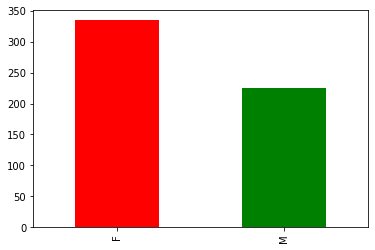

In [11]:
df['Gender'].value_counts().plot(kind='bar',color=['r','g']); #Total Number of males and females

Gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

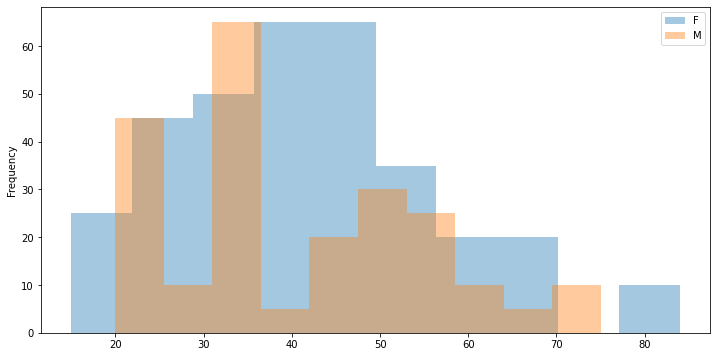

In [14]:
df.groupby('Gender').Age.plot(kind='hist', figsize=[12,6], alpha=.4, legend=True) #Getting the Frequency of Males and Females

In [16]:
df['label'] = [1 if re.search( 'S1', x) else 0 for x in df['Impression']] #Getting the S1 Level patience data and assiging the LABEL

In [17]:
df.head()

,Images,Impression,Age,Gender,label
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...,65,F,1


In [18]:
df.tail()

,Images,Impression,Age,Gender,label
555,SK_ASHA_35Y_16,No significant abnormality detected.,35,F,0
556,SK_ASHA_35Y_17,No significant abnormality detected.,35,F,0
557,SK_ASHA_35Y_18,No significant abnormality detected.,35,F,0
558,SK_ASHA_35Y_19,No significant abnormality detected.,35,F,0
559,SK_ASHA_35Y_20,No significant abnormality detected.,35,F,0


In [19]:
df[(df['Gender'] == 'M') & (df['label'] == 1)]

,Images,Impression,Age,Gender,label
10,A_GOWRI_SHANKAR_30Y_M_1,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
11,A_GOWRI_SHANKAR_30Y_M_2,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
12,A_GOWRI_SHANKAR_30Y_M_3,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
13,A_GOWRI_SHANKAR_30Y_M_4,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
14,A_GOWRI_SHANKAR_30Y_M_5,"Diffuse disc bulge is at L5-S1 level, compress...",30,M,1
...,...,...,...,...,...
370,U_UDAYA_CHANDRA_RAO_57Y_M_1,Minimal scoliossis of lumbar spine with convex...,57,M,1
371,U_UDAYA_CHANDRA_RAO_57Y_M_2,Minimal scoliossis of lumbar spine with convex...,57,M,1
372,U_UDAYA_CHANDRA_RAO_57Y_M_3,Minimal scoliossis of lumbar spine with convex...,57,M,1
373,U_UDAYA_CHANDRA_RAO_57Y_M_4,Minimal scoliossis of lumbar spine with convex...,57,M,1


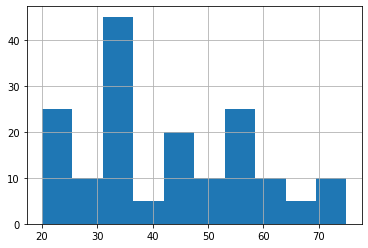

In [20]:
df[(df['Gender'] == 'M') & (df['label'] == 1)].Age.hist() #Information about Males Data

In [21]:
df[(df['Gender'] == 'F') & (df['label'] == 1)]

,Images,Impression,Age,Gender,label
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...,65,F,1
...,...,...,...,...,...
375,U_VIJAYA_45Y_F_1,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
376,U_VIJAYA_45Y_F_2,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
377,U_VIJAYA_45Y_F_3,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1
378,U_VIJAYA_45Y_F_4,Grade 1 retrolisthesis is at L5-S1 level with ...,45,F,1


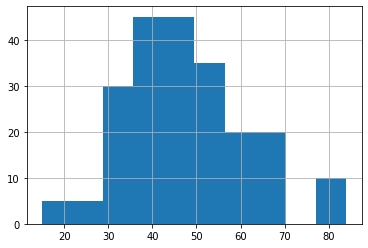

In [22]:
df[(df['Gender'] == 'F') & (df['label'] == 1)].Age.hist() #Information about Females Data

In [23]:
df[(df['Gender'] == 'M') & (df['label'] == 1)].shape[0]

165

In [24]:
df[(df['Gender'] == 'F') & (df['label'] == 1)].shape[0]

215

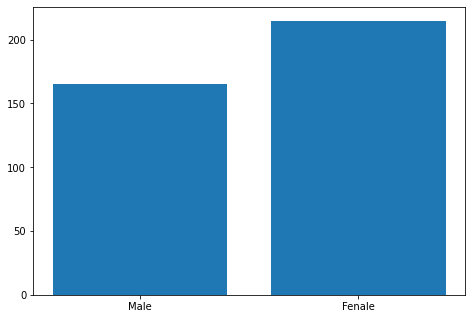

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Gender = ['Male', 'Fenale']
Effected = [df[(df['Gender'] == 'M') & (df['label'] == 1)].shape[0],df[(df['Gender'] == 'F') & (df['label'] == 1)].shape[0]]
ax.bar(Gender, Effected)
plt.show()

In [26]:
data = df[['Images','Impression']]

In [27]:
data.head()

,Images,Impression
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...


In [28]:
dataset = data.copy()

In [29]:
dataset.rename(columns = {'Images':'Image_path','Impression':'Finding'}, inplace = True)

In [30]:
dataset

,Image_path,Finding
0,A_ADI_LAKSHMI_65Y_F_1,Flaval hypertrophy is at all levels in lumbar ...
1,A_ADI_LAKSHMI_65Y_F_2,Flaval hypertrophy is at all levels in lumbar ...
2,A_ADI_LAKSHMI_65Y_F_3,Flaval hypertrophy is at all levels in lumbar ...
3,A_ADI_LAKSHMI_65Y_F_4,Flaval hypertrophy is at all levels in lumbar ...
4,A_ADI_LAKSHMI_65Y_F_5,Flaval hypertrophy is at all levels in lumbar ...
...,...,...
555,SK_ASHA_35Y_16,No significant abnormality detected.
556,SK_ASHA_35Y_17,No significant abnormality detected.
557,SK_ASHA_35Y_18,No significant abnormality detected.
558,SK_ASHA_35Y_19,No significant abnormality detected.


In [33]:
dataset = dataset.sample(frac=1).reset_index(drop=True).copy()

In [34]:

print('Dataset Shape:', dataset.shape)

Dataset Shape: (560, 2)


In [35]:
def absolute_path(x): # making the paths absolute to get the image data along with Impession
    '''Makes the path absolute '''
    x = 'Data/'+ x + '.jpg'
    return x

In [36]:
dataset['Image_path'] = dataset['Image_path'].apply(lambda x : absolute_path(x)) 

In [37]:
dataset.head()

,Image_path,Finding
0,Data/N_SRINU_31Y_M_3.jpg,Spondylolysis with grade 1 listhesis is at L5-...
1,Data/N_PITCHAMMA_40Y_F_2.jpg,Tranitional vertebra is S1 level-? Lumbarisati...
2,Data/K_SEEMA_27Y_3.jpg,No significant abnormality detected.
3,Data/J_SUBBAYAMMA_58Y_F_4.jpg,"Central disc extrusion is at L4-5 level, compr..."
4,Data/B_ANKAMMA_65Y_F_4.jpg,Minimal scolisosis of liumbar spine with conve...


In [38]:
%cd /content/drive/MyDrive/Main Capstone/

/content/drive/MyDrive/Main Capstone


In [46]:
h = []
w = []
for i in tqdm(np.unique(dataset['Image_path'].values)):
    img = cv.imread(i)
    h.append(img.shape[0])
    w.append(img.shape[0])

100%|██████████| 560/560 [02:42<00:00,  3.45it/s]


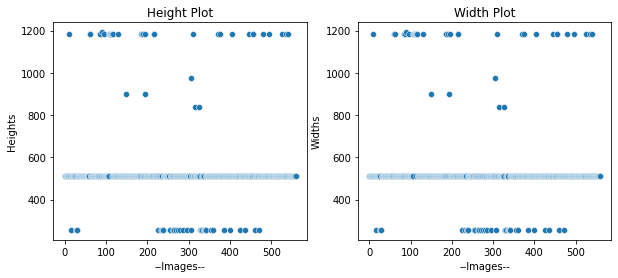

In [47]:
plt.figure(figsize=(10,4)) #Height and width of the Images
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(range(len(h)), h)
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(range(len(w)), h)

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [ ]:
input_shape = (224,224,3) #Pre-trained ResNet50 Model Implementation
inputs = Input(input_shape)
resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs, pooling="avg")
resnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
X = resnet50.output 
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=resnet50.input, outputs=X)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# chex = densenet.DenseNet121(include_top=False, weights = None, input_shape=(224,224,3), pooling="avg")

In [ ]:
# X = chex.output
# X = Dense(14, activation="sigmoid", name="predictions")(X)
# model = Model(inputs=chex.input, outputs=X)

In [ ]:
# chex.output

In [ ]:
# model.summary()

In [ ]:
# # This contains weights for the CheXNet network
# # It has the weight  for the last layer of the chexnet network as well, therefore an additional layer is added in the
# # previous cell block to fit the weights which can be removed later.
# model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [ ]:

model = Model(inputs = model.input, outputs = model.layers[-2].output)
# model.summary will show you all the layers in the model

In [ ]:
model.summary() #Summary of the Model and their layers

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
def load_image(img_name): #Reshaping the Image size and converting it to Array
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    
    return X

In [ ]:
# img = load_image(dataset['Image_path'][0])
# # plt.imshow(img[0])

In [ ]:
dataset.shape

(560, 2)

In [ ]:
dataset.head()

,Image_path,Finding
0,Data/S_RAMBABU_32Y_M_3.jpg,"Central disc protrusion is at L5-S1 level, com..."
1,Data/CH_SRIKANTH_23Y_M_5.jpg,Collapse of L1 vertebra is with focal spinal c...
2,Data/N_SAVITHRI_45Y_F_4.jpg,"Mild diffuse disc bulge is at L3-L4, L4-L5, L5..."
3,Data/N_ANNA_PURNAMMA_84Y_F_1.jpg,"Small Disc osteophyte complexes are at C3-C4, ..."
4,Data/S_KOTESWARA_RAO_50Y_M_4.jpg,"PLIF status is noted at L4,L5 level.Post opera..."


In [ ]:
t = 'Data/A_ADI_LAKSHMI_65Y_F_1.jpg'
t.split('/')[1].split('.')[0]

'A_ADI_LAKSHMI_65Y_F_1'

In [ ]:
def train_test_split(data): #Spiliting the Data into Train and Test
    # persons = data.tolist()
    persons_train = data[:400]
    persons_test = data[401:]
    return persons_train, persons_test

In [ ]:
images_train, images_test = train_test_split(dataset)

In [ ]:
images_train.tail()

,Image_path,Finding
395,Data/B_PARAIAH_48Y_5.jpg,No significant abnormality detected.
396,Data/A_J_CH_RANI_38Y_15.jpg,No significant abnormality detected.
397,Data/N_ANKALAMMA_47Y_F_3.jpg,"Small Disc osteophyte complexes are at C3-C4, ..."
398,Data/A_J_CH_RANI_38Y_16.jpg,No significant abnormality detected.
399,Data/D_VENKATASIVA_KUMARI_41Y_F_1.jpg,"Small disc osteophyte complexes are at C3-C4, ..."


In [ ]:
a,b = images_train.values[0]
a

'Data/S_RAMBABU_32Y_M_3.jpg'

In [ ]:
images_test

,Image_path,Finding
401,Data/D_GOPI_KRISHNA_REDDY_20Y_M_4.jpg,"Diffuse disc bulge is at L3-L4, L4-L5, L5-S1 l..."
402,Data/K_SEEMA_27Y_11.jpg,No significant abnormality detected.
403,Data/A_NARASAMMA_62Y_F_5.jpg,Post operative changes in posterior elements o...
404,Data/D_CHINA_BRAHAMAIAH_60Y_M_5.jpg,Grade 1 spondylolisthesis is at L5-S1 level wi...
405,Data/S_NAGA_RATNAM_70Y_F_3.jpg,"C3,C4 congenital block vertebra is noted.Disc ..."
...,...,...
555,Data/A_NARASAMMA_45Y_F_4.jpg,"Diffuse disc bulge is noted at L3-L4, L4-L5, L..."
556,Data/D_JAYA_RAMULU_55Y_M_1.jpg,"Small Disc osteophyte complexes are at C3-C4, ..."
557,Data/B_PARAIAH_48Y_11.jpg,No significant abnormality detected.
558,Data/P_HARSHITHA_15Y_19.jpg,No significant abnormality detected.


In [ ]:
def image_features(train,test): #Getting the IMAGE FEATURES
    Xnet_features_attention = {}
    
    for img1 in tqdm(train):
        i1 = load_image(img1)
        img1_features = model.predict(i1)
        print('img1_features',img1_features.shape)
        # (None,1024)

        input_ = img1_features
        key = img1.split('/')[1].split('.')[0]
        # input_ = tf.reshape(input_, (img1_features.shape[0], -1, img1_features.shape[-1]))
        # print('input_',input_.shape)
        Xnet_features_attention[key] = input_
    
    for img1 in tqdm(test):
        i1 = load_image(img1)
        img1_features = model.predict(i1)


        # i2 = load_image(img2)
        # img2_features = model.predict(i2)

        input_ = img1_features
        key = img1.split('/')[1].split('.')[0]
        # input_ = tf.reshape(input_, (input_.shape[0], -1, input_.shape[-1]))

        Xnet_features_attention[key] = input_
        
    return Xnet_features_attention

In [ ]:
#Xnet_features_attention = image_features(images_train['Image_path'][0:1],images_test['Image_path'][0:1])

  0%|          | 0/1 [00:00<?, ?it/s]

img1_features (1, 2048)


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


In [ ]:
images_train['Image_path'][0]

'Data/A_SRINIVAS_REDDY_52Y_M_2.jpg'

In [ ]:
Xnet_features_attention = image_features(images_train['Image_path'], images_test['Image_path'])

img1_features (1, 2048)


 99%|█████████▉| 397/400 [02:52<00:01,  2.37it/s]

img1_features (1, 2048)


100%|█████████▉| 398/400 [02:52<00:00,  2.42it/s]

img1_features (1, 2048)


100%|█████████▉| 399/400 [02:53<00:00,  2.40it/s]

img1_features (1, 2048)


  0%|          | 0/159 [00:00<?, ?it/s]

img1_features (1, 2048)


100%|██████████| 159/159 [01:06<00:00,  2.39it/s]


In [ ]:
Xnet_features_attention['T_RAJESWARI_45Y_F_1'].shape

(1, 2048)

In [ ]:
# Xnet_features_attention['Scanned Images/CXR1_1_IM-0001_0'].shape

In [ ]:

# save the file for future use
f = open('Image_features_attention_restnet50.pickle','wb')
pickle.dump(Xnet_features_attention, f)
f.close()

# DA and Cleaning

In [ ]:
images_train.head()

,Image_path,Finding
0,Data/S_RAMBABU_32Y_M_3.jpg,"Central disc protrusion is at L5-S1 level, com..."
1,Data/CH_SRIKANTH_23Y_M_5.jpg,Collapse of L1 vertebra is with focal spinal c...
2,Data/N_SAVITHRI_45Y_F_4.jpg,"Mild diffuse disc bulge is at L3-L4, L4-L5, L5..."
3,Data/N_ANNA_PURNAMMA_84Y_F_1.jpg,"Small Disc osteophyte complexes are at C3-C4, ..."
4,Data/S_KOTESWARA_RAO_50Y_M_4.jpg,"PLIF status is noted at L4,L5 level.Post opera..."


In [ ]:
# dataset['Finding'].str.contains('.|,',regex=True)

In [ ]:
#PRE-PROCESSING the Impressions Text data
def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, " ")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        temp = ' '.join(e for e in line.split())  # removes multiple_spaces
        temp = re.sub("'",'',temp)                # removes apostrophes
        temp = re.sub('\.', ' .', temp)           # addding aspace before fullstop
        temp = re.sub(r'\.\.+', '.', temp)        # Removes multiple full stops from the text
        new_text.append(temp.lower())             # Converts to lowercase
    return new_text


In [ ]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = rem_punctuations(text)
    new_text = multiple_spaces(new_text)
  
    return new_text

In [ ]:
images_train['Finding'] = text_preprocessing(images_train['Finding'])
images_test['Finding'] = text_preprocessing(images_test['Finding'])
# Flaval hypertrophy is at all levels in lumbar spine.Diffuse disc bulge is at L4-L5, L5-S1 levels, compressing thecal sac with focal spinal canal narrowing, encroaching bilateral neural foramen. 

In [ ]:
images_train.head(5)

,Image_path,Finding
0,Data/S_RAMBABU_32Y_M_3.jpg,central disc protrusion is at l5-s1 level comp...
1,Data/CH_SRIKANTH_23Y_M_5.jpg,collapse of l1 vertebra is with focal spinal c...
2,Data/N_SAVITHRI_45Y_F_4.jpg,mild diffuse disc bulge is at l3-l4 l4-l5 l5-s...
3,Data/N_ANNA_PURNAMMA_84Y_F_1.jpg,small disc osteophyte complexes are at c3-c4 c...
4,Data/S_KOTESWARA_RAO_50Y_M_4.jpg,plif status is noted at l4 l5 level .post oper...


In [ ]:
l = [len(e.split()) for e in images_train['Finding'].values]
max_len= max(l)

In [ ]:
images_train.head(5)

,Image_path,Finding
0,Data/K_SEEMA_27Y_14.jpg,no significant abnormality detected .
1,Data/K_JHANSI_RANI_60Y_F_5.jpg,diffuse disc bulge is at l3-l4 l4-l5 l5-s1 lev...
2,Data/KHASIM_BIAG_31Y_4.jpg,no significant abnormality detected .
3,Data/U_VIJAYA_45Y_F_5.jpg,grade 1 retrolisthesis is at l5-s1 level with ...
4,Data/D_TIRUPATHAMMA_40Y_F_3.jpg,small disc osteophyte complexes are at c3-c4 c...


Text(0, 0.5, 'Number of words')

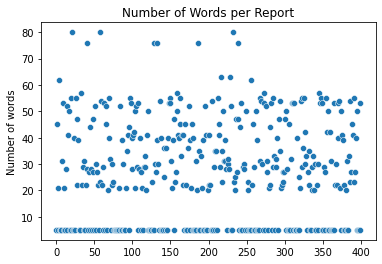

In [ ]:
plt.title('Number of Words per Report')
sns.scatterplot(range(images_train.shape[0]), l)
plt.ylabel('Number of words')

In [ ]:

l = []
for i in images_train['Finding'].values:
    l.extend(i.split())


c = Counter(l)

words = []
count = []
for k,v in c.items():
    words.append(k)
    count.append(v)
words_count = list(zip(count, words))


top_50_words = sorted(words_count)[::-1][:50]
bottom_50_words = sorted(words_count)[:50]

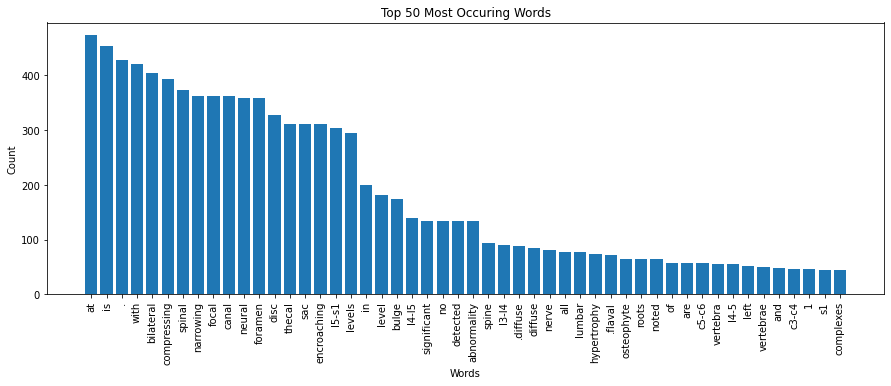

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(range(50), [c for c,w in top_50_words])
plt.title('Top 50 Most Occuring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(ticks=range(50), labels=[w for c,w in top_50_words], rotation=90);

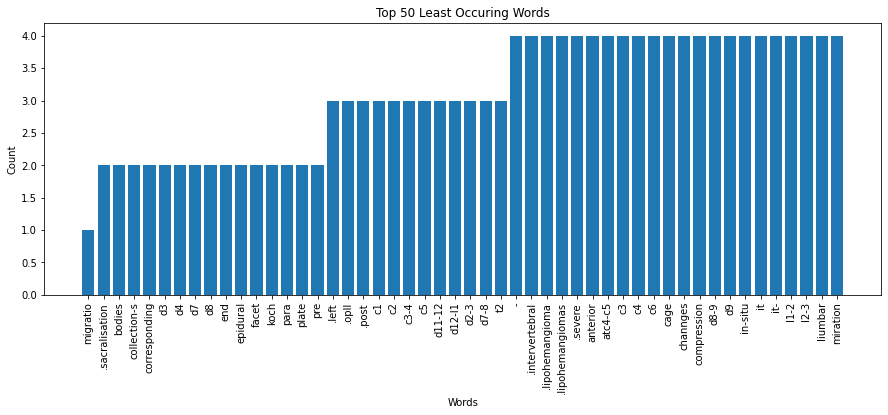

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(range(50), [c for c,w in bottom_50_words])
plt.title('Top 50 Least Occuring Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(ticks=range(50), labels=[w for c,w in bottom_50_words], rotation=90);

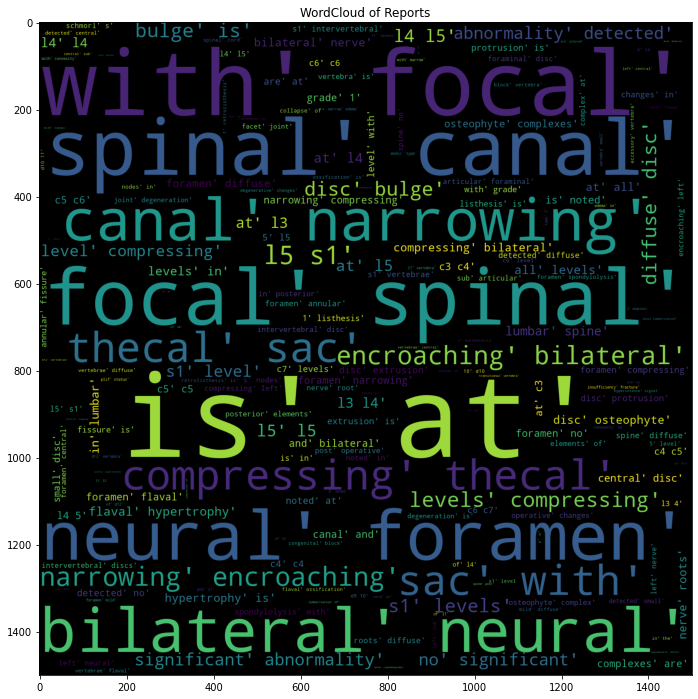

In [ ]:
w = WordCloud(height=1500, width=1500).generate(str(l))

plt.figure(figsize=(12,12))
plt.title('WordCloud of Reports')
plt.imshow(w);

In [ ]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return '<start>' + ' ' + x + ' ' + '<end>'
images_train['Finding'] = images_train['Finding'].apply(lambda x : remodelling(x))
images_test['Finding'] = images_test['Finding'].apply(lambda x : remodelling(x))

In [ ]:
# save the cleaned data(STRUCTURED DATA)
images_train.to_csv('Train_Data.csv', index=False)
images_test.to_csv('Test_Data.csv', index=False)

#Encoder - Decoder

In [ ]:
train_dataset = pd.read_csv('Train_Data.csv')
test_dataset = pd.read_csv('Test_Data.csv')

In [ ]:
train_dataset.shape, test_dataset.shape

((400, 2), (159, 2))

In [ ]:
def get_id(x):
  id = x.split('/')[1].split('.')[0]
  return id

In [ ]:
train_dataset['id'] = train_dataset['Image_path'].apply(get_id)
test_dataset['id'] = test_dataset['Image_path'].apply(get_id)

In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/D_GOPI_KRISHNA_REDDY_20Y_M_4.jpg,<start> diffuse disc bulge is at l3-l4 l4-l5 l...,D_GOPI_KRISHNA_REDDY_20Y_M_4
1,Data/K_SEEMA_27Y_11.jpg,<start> no significant abnormality detected . ...,K_SEEMA_27Y_11
2,Data/A_NARASAMMA_62Y_F_5.jpg,<start> post operative changes in posterior el...,A_NARASAMMA_62Y_F_5
3,Data/D_CHINA_BRAHAMAIAH_60Y_M_5.jpg,<start> grade 1 spondylolisthesis is at l5-s1 ...,D_CHINA_BRAHAMAIAH_60Y_M_5
4,Data/S_NAGA_RATNAM_70Y_F_3.jpg,<start> c3 c4 congenital block vertebra is not...,S_NAGA_RATNAM_70Y_F_3
...,...,...,...
154,Data/A_NARASAMMA_45Y_F_4.jpg,<start> diffuse disc bulge is noted at l3-l4 l...,A_NARASAMMA_45Y_F_4
155,Data/D_JAYA_RAMULU_55Y_M_1.jpg,<start> small disc osteophyte complexes are at...,D_JAYA_RAMULU_55Y_M_1
156,Data/B_PARAIAH_48Y_11.jpg,<start> no significant abnormality detected . ...,B_PARAIAH_48Y_11
157,Data/P_HARSHITHA_15Y_19.jpg,<start> no significant abnormality detected . ...,P_HARSHITHA_15Y_19


In [ ]:
train_dataset.head()

,Image_path,Finding,id
0,Data/S_RAMBABU_32Y_M_3.jpg,<start> central disc protrusion is at l5-s1 le...,S_RAMBABU_32Y_M_3
1,Data/CH_SRIKANTH_23Y_M_5.jpg,<start> collapse of l1 vertebra is with focal ...,CH_SRIKANTH_23Y_M_5
2,Data/N_SAVITHRI_45Y_F_4.jpg,<start> mild diffuse disc bulge is at l3-l4 l4...,N_SAVITHRI_45Y_F_4
3,Data/N_ANNA_PURNAMMA_84Y_F_1.jpg,<start> small disc osteophyte complexes are at...,N_ANNA_PURNAMMA_84Y_F_1
4,Data/S_KOTESWARA_RAO_50Y_M_4.jpg,<start> plif status is noted at l4 l5 level .p...,S_KOTESWARA_RAO_50Y_M_4


In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/D_GOPI_KRISHNA_REDDY_20Y_M_4.jpg,<start> diffuse disc bulge is at l3-l4 l4-l5 l...,D_GOPI_KRISHNA_REDDY_20Y_M_4
1,Data/K_SEEMA_27Y_11.jpg,<start> no significant abnormality detected . ...,K_SEEMA_27Y_11
2,Data/A_NARASAMMA_62Y_F_5.jpg,<start> post operative changes in posterior el...,A_NARASAMMA_62Y_F_5
3,Data/D_CHINA_BRAHAMAIAH_60Y_M_5.jpg,<start> grade 1 spondylolisthesis is at l5-s1 ...,D_CHINA_BRAHAMAIAH_60Y_M_5
4,Data/S_NAGA_RATNAM_70Y_F_3.jpg,<start> c3 c4 congenital block vertebra is not...,S_NAGA_RATNAM_70Y_F_3
...,...,...,...
154,Data/A_NARASAMMA_45Y_F_4.jpg,<start> diffuse disc bulge is noted at l3-l4 l...,A_NARASAMMA_45Y_F_4
155,Data/D_JAYA_RAMULU_55Y_M_1.jpg,<start> small disc osteophyte complexes are at...,D_JAYA_RAMULU_55Y_M_1
156,Data/B_PARAIAH_48Y_11.jpg,<start> no significant abnormality detected . ...,B_PARAIAH_48Y_11
157,Data/P_HARSHITHA_15Y_19.jpg,<start> no significant abnormality detected . ...,P_HARSHITHA_15Y_19


In [ ]:
pad_size = 153   # Max length

In [ ]:
X_train, X_test = train_dataset['id'], test_dataset['id']
y_train, y_test = train_dataset['Finding'], test_dataset['Finding']

In [ ]:
X_test

0      D_GOPI_KRISHNA_REDDY_20Y_M_4
1                    K_SEEMA_27Y_11
2               A_NARASAMMA_62Y_F_5
3        D_CHINA_BRAHAMAIAH_60Y_M_5
4             S_NAGA_RATNAM_70Y_F_3
                   ...             
154             A_NARASAMMA_45Y_F_4
155           D_JAYA_RAMULU_55Y_M_1
156                B_PARAIAH_48Y_11
157              P_HARSHITHA_15Y_19
158               S_RAMBABU_32Y_M_5
Name: id, Length: 159, dtype: object

In [ ]:
y_test

0      <start> diffuse disc bulge is at l3-l4 l4-l5 l...
1      <start> no significant abnormality detected . ...
2      <start> post operative changes in posterior el...
3      <start> grade 1 spondylolisthesis is at l5-s1 ...
4      <start> c3 c4 congenital block vertebra is not...
                             ...                        
154    <start> diffuse disc bulge is noted at l3-l4 l...
155    <start> small disc osteophyte complexes are at...
156    <start> no significant abnormality detected . ...
157    <start> no significant abnormality detected . ...
158    <start> central disc protrusion is at l5-s1 le...
Name: Finding, Length: 159, dtype: object

In [ ]:
X_train

0                 S_RAMBABU_32Y_M_3
1               CH_SRIKANTH_23Y_M_5
2                N_SAVITHRI_45Y_F_4
3           N_ANNA_PURNAMMA_84Y_F_1
4           S_KOTESWARA_RAO_50Y_M_4
                   ...             
395                 B_PARAIAH_48Y_5
396              A_J_CH_RANI_38Y_15
397             N_ANKALAMMA_47Y_F_3
398              A_J_CH_RANI_38Y_16
399    D_VENKATASIVA_KUMARI_41Y_F_1
Name: id, Length: 400, dtype: object

In [ ]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)


In [ ]:
tokenizer.word_index['start']

8

In [ ]:
y_train

0      <start> central disc protrusion is at l5-s1 le...
1      <start> collapse of l1 vertebra is with focal ...
2      <start> mild diffuse disc bulge is at l3-l4 l4...
3      <start> small disc osteophyte complexes are at...
4      <start> plif status is noted at l4 l5 level .p...
                             ...                        
395    <start> no significant abnormality detected . ...
396    <start> no significant abnormality detected . ...
397    <start> small disc osteophyte complexes are at...
398    <start> no significant abnormality detected . ...
399    <start> small disc osteophyte complexes are at...
Name: Finding, Length: 400, dtype: object

In [ ]:
%cd /content/drive/MyDrive/Main Capstone/

f = open('Image_features_attention_restnet50.pickle','rb') # contains the features from chexNet
Xnet_Features = pickle.load(f)
f.close()

/content/drive/MyDrive/Main Capstone


In [ ]:
Xnet_Features['D_JAYA_RAMULU_55Y_M_2'].shape

(1, 2048)

In [ ]:
# Xnet_Features

In [ ]:
f = open('glove.840B.300d.pkl','rb') # 300d glove vectors  
glove_vectors = pickle.load(f)
f.close()

In [ ]:
vocab_size = len(tokenizer.word_index.keys()) + 1

In [ ]:
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [ ]:
BATCH_SIZE = 14

In [ ]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = Xnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [ ]:
Xnet_Features['SK_ASHA_35Y_13']

array([[0.        , 0.07958701, 0.        , ..., 3.5342507 , 0.01681539,
        0.        ]], dtype=float32)

In [ ]:
def create_dataset(img_name, caption):
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))
    print("Type",type(dataset))
    print(dataset)
    # for ele in dataset:
    #     print(ele)
    # print(tf.data.Dataset.from_tensor_slices((img_name, caption)))
  #   print('dataset', dataset)
  # # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                           num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [ ]:
train_generator = create_dataset(X_train, y_train)


Type <class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>


In [ ]:
type(train_generator)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
# for ele, x in train_generator:
#       print(ele,x)

In [ ]:
type(train_generator)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
X_train.shape, y_train.shape

((400,), (400,))

In [ ]:
y_train

0      <start> central disc protrusion is at l5-s1 le...
1      <start> collapse of l1 vertebra is with focal ...
2      <start> mild diffuse disc bulge is at l3-l4 l4...
3      <start> small disc osteophyte complexes are at...
4      <start> plif status is noted at l4 l5 level .p...
                             ...                        
395    <start> no significant abnormality detected . ...
396    <start> no significant abnormality detected . ...
397    <start> small disc osteophyte complexes are at...
398    <start> no significant abnormality detected . ...
399    <start> small disc osteophyte complexes are at...
Name: Finding, Length: 400, dtype: object

In [ ]:
X_train

0                 S_RAMBABU_32Y_M_3
1               CH_SRIKANTH_23Y_M_5
2                N_SAVITHRI_45Y_F_4
3           N_ANNA_PURNAMMA_84Y_F_1
4           S_KOTESWARA_RAO_50Y_M_4
                   ...             
395                 B_PARAIAH_48Y_5
396              A_J_CH_RANI_38Y_15
397             N_ANKALAMMA_47Y_F_3
398              A_J_CH_RANI_38Y_16
399    D_VENKATASIVA_KUMARI_41Y_F_1
Name: id, Length: 400, dtype: object

In [ ]:
train_generator

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.string)>

In [ ]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [ ]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset(A WORD BY WORD DATASET)'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)
        
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [ ]:
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
random.seed(12)

In [ ]:
# input1 = Input(shape=(49,1024), name='Image_1')
# dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

# input2 = Input(shape=(82), name='Text_Input')
# emb_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=82, mask_zero=True, trainable=False, 
#                 weights=[embedding_matrix], name="Embedding_layer")
# emb = emb_layer(input2)

# LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
#             kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
#             recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
#             bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
# #LSTM1_output = LSTM1(emb)

# LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
#             kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
#             recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
#             bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
# LSTM2_output = LSTM2(LSTM1)

# dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

# dec =  tf.keras.layers.Add()([dense1, dropout1])

# fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
# fc1_output = fc1(dec)
# dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
# output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
# output = output_layer(dropout2)

# encoder_decoder = Model(inputs = [input1, input2], outputs = output)
# encoder_decoder.summary()

In [ ]:
input1 = Input(shape=(2048), name='Image_1')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)
input2 = Input(shape=(82), name='Text_Input')
emb_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=82, mask_zero=True, trainable=False, 
                weights=[embedding_matrix], name="Embedding_layer")
emb = emb_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

# distributed = TimeDistributed(Dense(56))(LSTM2_output)
# pool = AveragePooling1D()(distributed)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)
dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Text_Input (InputLayer)         [(None, 82)]         0                                            
__________________________________________________________________________________________________
Embedding_layer (Embedding)     (None, 82, 300)      54900       Text_Input[0][0]                 
__________________________________________________________________________________________________
LSTM1 (LSTM)                    (None, 82, 256)      570368      Embedding_layer[0][0]            
__________________________________________________________________________________________________
Image_1 (InputLayer)            [(None, 2048)]       0                                            
____________________________________________________________________________________________

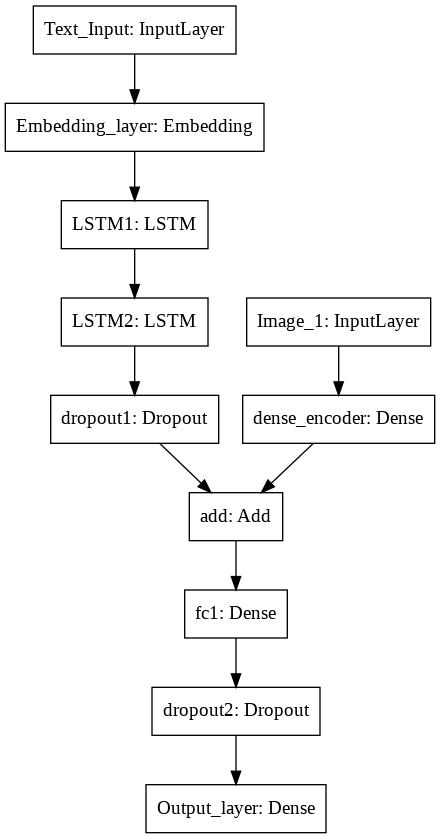

In [ ]:
tf.keras.utils.plot_model(encoder_decoder)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    
    #calculating the loss
    loss_ = loss_function(y_true, y_pred)
    
    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    #applying the mask to loss
    loss_ = loss_*mask
    
    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [ ]:
encoder_decoder.compile(optimizer, loss = maskedLoss)

In [ ]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [ ]:
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(50):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0
    
    for img, report in train_generator:
       
        r1 = bytes_to_string(report.numpy())
        # print(f'Image shapee : {img.shape}')
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=82, padding='post')
        # print(img_input,rep_input,output_word)
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)
        # print(f'Results ---> {results}')
        
        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)
    
    # for img, report in cv_generator:
        
    #     r1 = bytes_to_string(report.numpy())
    #     img_input, rep_input, output_word = convert(img.numpy(), r1)
    #     rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
    #     results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
    #     batch_loss_vl += results
    
    # val_loss = batch_loss_vl/(X_cv.shape[0]//14)
    
    # with val_summary_writer.as_default():
    #     tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    # epoch_val_loss.append(val_loss)
    
    # print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Training Loss: {},'.format(train_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))   
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')

EPOCH :  1
Training Loss: 0.024199126554386958,
Time Taken for this Epoch : 141.9408884048462 sec
EPOCH :  2
Training Loss: 0.017377152207440565,
Time Taken for this Epoch : 116.25182485580444 sec
EPOCH :  3
Training Loss: 0.01353771991229483,
Time Taken for this Epoch : 135.26888847351074 sec
EPOCH :  4
Training Loss: 0.010568030910300357,
Time Taken for this Epoch : 122.13730144500732 sec
EPOCH :  5
Training Loss: 0.008606380018006479,
Time Taken for this Epoch : 121.82084465026855 sec
EPOCH :  6
Training Loss: 0.007392407843976149,
Time Taken for this Epoch : 116.90248417854309 sec
EPOCH :  7
Training Loss: 0.006218086462467909,
Time Taken for this Epoch : 141.91903257369995 sec
EPOCH :  8
Training Loss: 0.005194949510041624,
Time Taken for this Epoch : 114.96054649353027 sec
EPOCH :  9
Training Loss: 0.004658891994040459,
Time Taken for this Epoch : 120.32445240020752 sec
EPOCH :  10
Training Loss: 0.0039945538987272555,
Time Taken for this Epoch : 141.92048120498657 sec
EPOCH :  1

In [ ]:
%pwd

'/content/drive/My Drive/Main Capstone'

## Inference Setup

In [ ]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder# 
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

## Greedy Search

In [ ]:

def greedysearch(img):
    image = Xnet_Features[img]
    input_ = 'start'
    image_features = encoder_model.predict(image)
    
    result = []
    for i in range(82):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 82, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [ ]:
test_dataset['id'].values[36]

'G_CHINNA_BULLEMMA_45Y_F_3'

## Eg: 1

In [ ]:
res36 = greedysearch(test_dataset['id'].values[36]) # Generated Impressoin result for an MRI Image 
res36

'disc osteophyte complex at level compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .diffuse disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . flaval hypertrophy in all levels in the spine . disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . flaval hypertrophy in all levels in the spine . disc bulge is at levels compressing thecal sac with focal'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Diffuse disc bulge is at L5-S1 level, compressing thecal sac with focal spinal canal narrowing, encroaching bilateral neural foramen.

In [ ]:
w = '<start>'
tokenizer.word_index['cage']

178

#Eg: 1

#Eg: 2

In [ ]:
res72 = greedysearch(test_dataset['id'].values[72]) # Generated Impressoin result for an MRI Image after 20 epochs
res72

'disc osteophyte complex at level compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .diffuse disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal'

In [ ]:
y_test[72] #Original Impression 

'<start> small disc osteophyte complexes are at c3-c4 c4-c5 c5-c6 c6-c7 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .diffuse disc bulge is at l3-l4 l4-l5 l5-s1 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .schmorl s nodes in l1 l2 l3 vertebrae .flaval hypertrophy is at all levels in lumbar spine . <end>'

#Eg: 3

In [ ]:
res108 = greedysearch(test_dataset['id'].values[108])  # Generated Impressoin result for an MRI Image after 20 epochs
res108

's1 vertebra with grade 1 listhesis is at level with focal spinal canal and bilateral neural foramen narrowing compressing bilateral nerve roots . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels'

In [ ]:
y_test[108] #Original Impression

'<start> small disc osteophyte complexes are at c3-c4 c4-c5 c5-c6 c6-c7 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .central disc protrusion is at l4-5 l5-s1 levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .annular fissure is in l4-5 l5-s1 intervertebral discs . <end>'

#Eg: 4

In [ ]:
res37 = greedysearch(test_dataset['id'].values[37])  # Generated Impressoin result for an MRI Image after 20 epochs
res37

'disc osteophyte complex at level compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen .diffuse disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . hypertrophy is at all levels in lumbar spine . disc bulge is at levels compressing thecal sac with focal'

In [ ]:
test_dataset['id'].values[37] #Original Impression

'KHASIM_BIAG_31Y_2'

In [ ]:
y_test.values[37] # original

'<start> no significant abnormality detected . <end>'

#Eg: 5

In [ ]:
res0 = greedysearch(test_dataset['id'].values[0]) # Generated Impressoin result for an MRI Image after 20 epochs
res0

'with abnormality canal and with grade 1 listhesis is at level with focal spinal canal and bilateral neural foramen narrowing compressing bilateral nerve roots . disc bulge is at level compressing thecal sac with focal spinal canal narrowing encroaching bilateral neural foramen . flaval hypertrophy in all levels in lumbar spine . are at levels in lumbar spine with left side .flaval is at levels .spondylolysis with grade 1 listhesis is at level with focal spinal canal and bilateral neural foramen narrowing'

In [ ]:
y_test.values[0] #Original Impression

'<start> spondylolysis with grade 1 listhesis is at l5-s1 level with focal spinal canal and bilateral neural foramen narrowing compressing bilateral nerve roots .flaval hypertrophy is noted at all levels in lumbar spine . <end>'

#BLEU SCORE

In [ ]:
def rem_fullstops(text):
    '''Removes punctuations'''
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations: 
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

In [ ]:
test_dataset

,Image_path,Finding,id
0,Data/D_GOPI_KRISHNA_REDDY_20Y_M_4.jpg,<start> diffuse disc bulge is at l3-l4 l4-l5 l...,D_GOPI_KRISHNA_REDDY_20Y_M_4
1,Data/K_SEEMA_27Y_11.jpg,<start> no significant abnormality detected . ...,K_SEEMA_27Y_11
2,Data/A_NARASAMMA_62Y_F_5.jpg,<start> post operative changes in posterior el...,A_NARASAMMA_62Y_F_5
3,Data/D_CHINA_BRAHAMAIAH_60Y_M_5.jpg,<start> grade 1 spondylolisthesis is at l5-s1 ...,D_CHINA_BRAHAMAIAH_60Y_M_5
4,Data/S_NAGA_RATNAM_70Y_F_3.jpg,<start> c3 c4 congenital block vertebra is not...,S_NAGA_RATNAM_70Y_F_3
...,...,...,...
154,Data/A_NARASAMMA_45Y_F_4.jpg,<start> diffuse disc bulge is noted at l3-l4 l...,A_NARASAMMA_45Y_F_4
155,Data/D_JAYA_RAMULU_55Y_M_1.jpg,<start> small disc osteophyte complexes are at...,D_JAYA_RAMULU_55Y_M_1
156,Data/B_PARAIAH_48Y_11.jpg,<start> no significant abnormality detected . ...,B_PARAIAH_48Y_11
157,Data/P_HARSHITHA_15Y_19.jpg,<start> no significant abnormality detected . ...,P_HARSHITHA_15Y_19


#CV BLEU

In [ ]:
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

159it [17:38,  6.66s/it]


In [ ]:
#Blue Score for the Generated Sentences
print('Bleu1 Score: ', sum(bleu1)/X_test.shape[0])
print('Bleu2 Score: ', sum(bleu2)/X_test.shape[0])
print('Bleu3 Score: ', sum(bleu3)/X_test.shape[0])
print('Bleu4 Score: ', sum(bleu4)/X_test.shape[0])

Bleu1 Score:  0.2564280282900576
Bleu2 Score:  0.2261556695202685
Bleu3 Score:  0.20515515575140741
Bleu4 Score:  0.19154198491270832
